In [227]:
import collections
from subject_opinion_mining import *
from eda import *
from model_evaluation import *
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import Image
from IPython.core.display import HTML 
import time
from ipywidgets import FloatProgress
from IPython.display import display
from bs4 import BeautifulSoup
import requests
import re
from os import path
from PIL import Image
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import statsmodels.api as sm
pd.set_option('display.max_columns', 500)
import math
from sklearn.metrics import mean_squared_error, mean_squared_log_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.learning_curve import validation_curve

In [2]:
master_df = pd.read_csv('Archive_CSV/final_df_forreg.csv',index_col=0)

# EDA

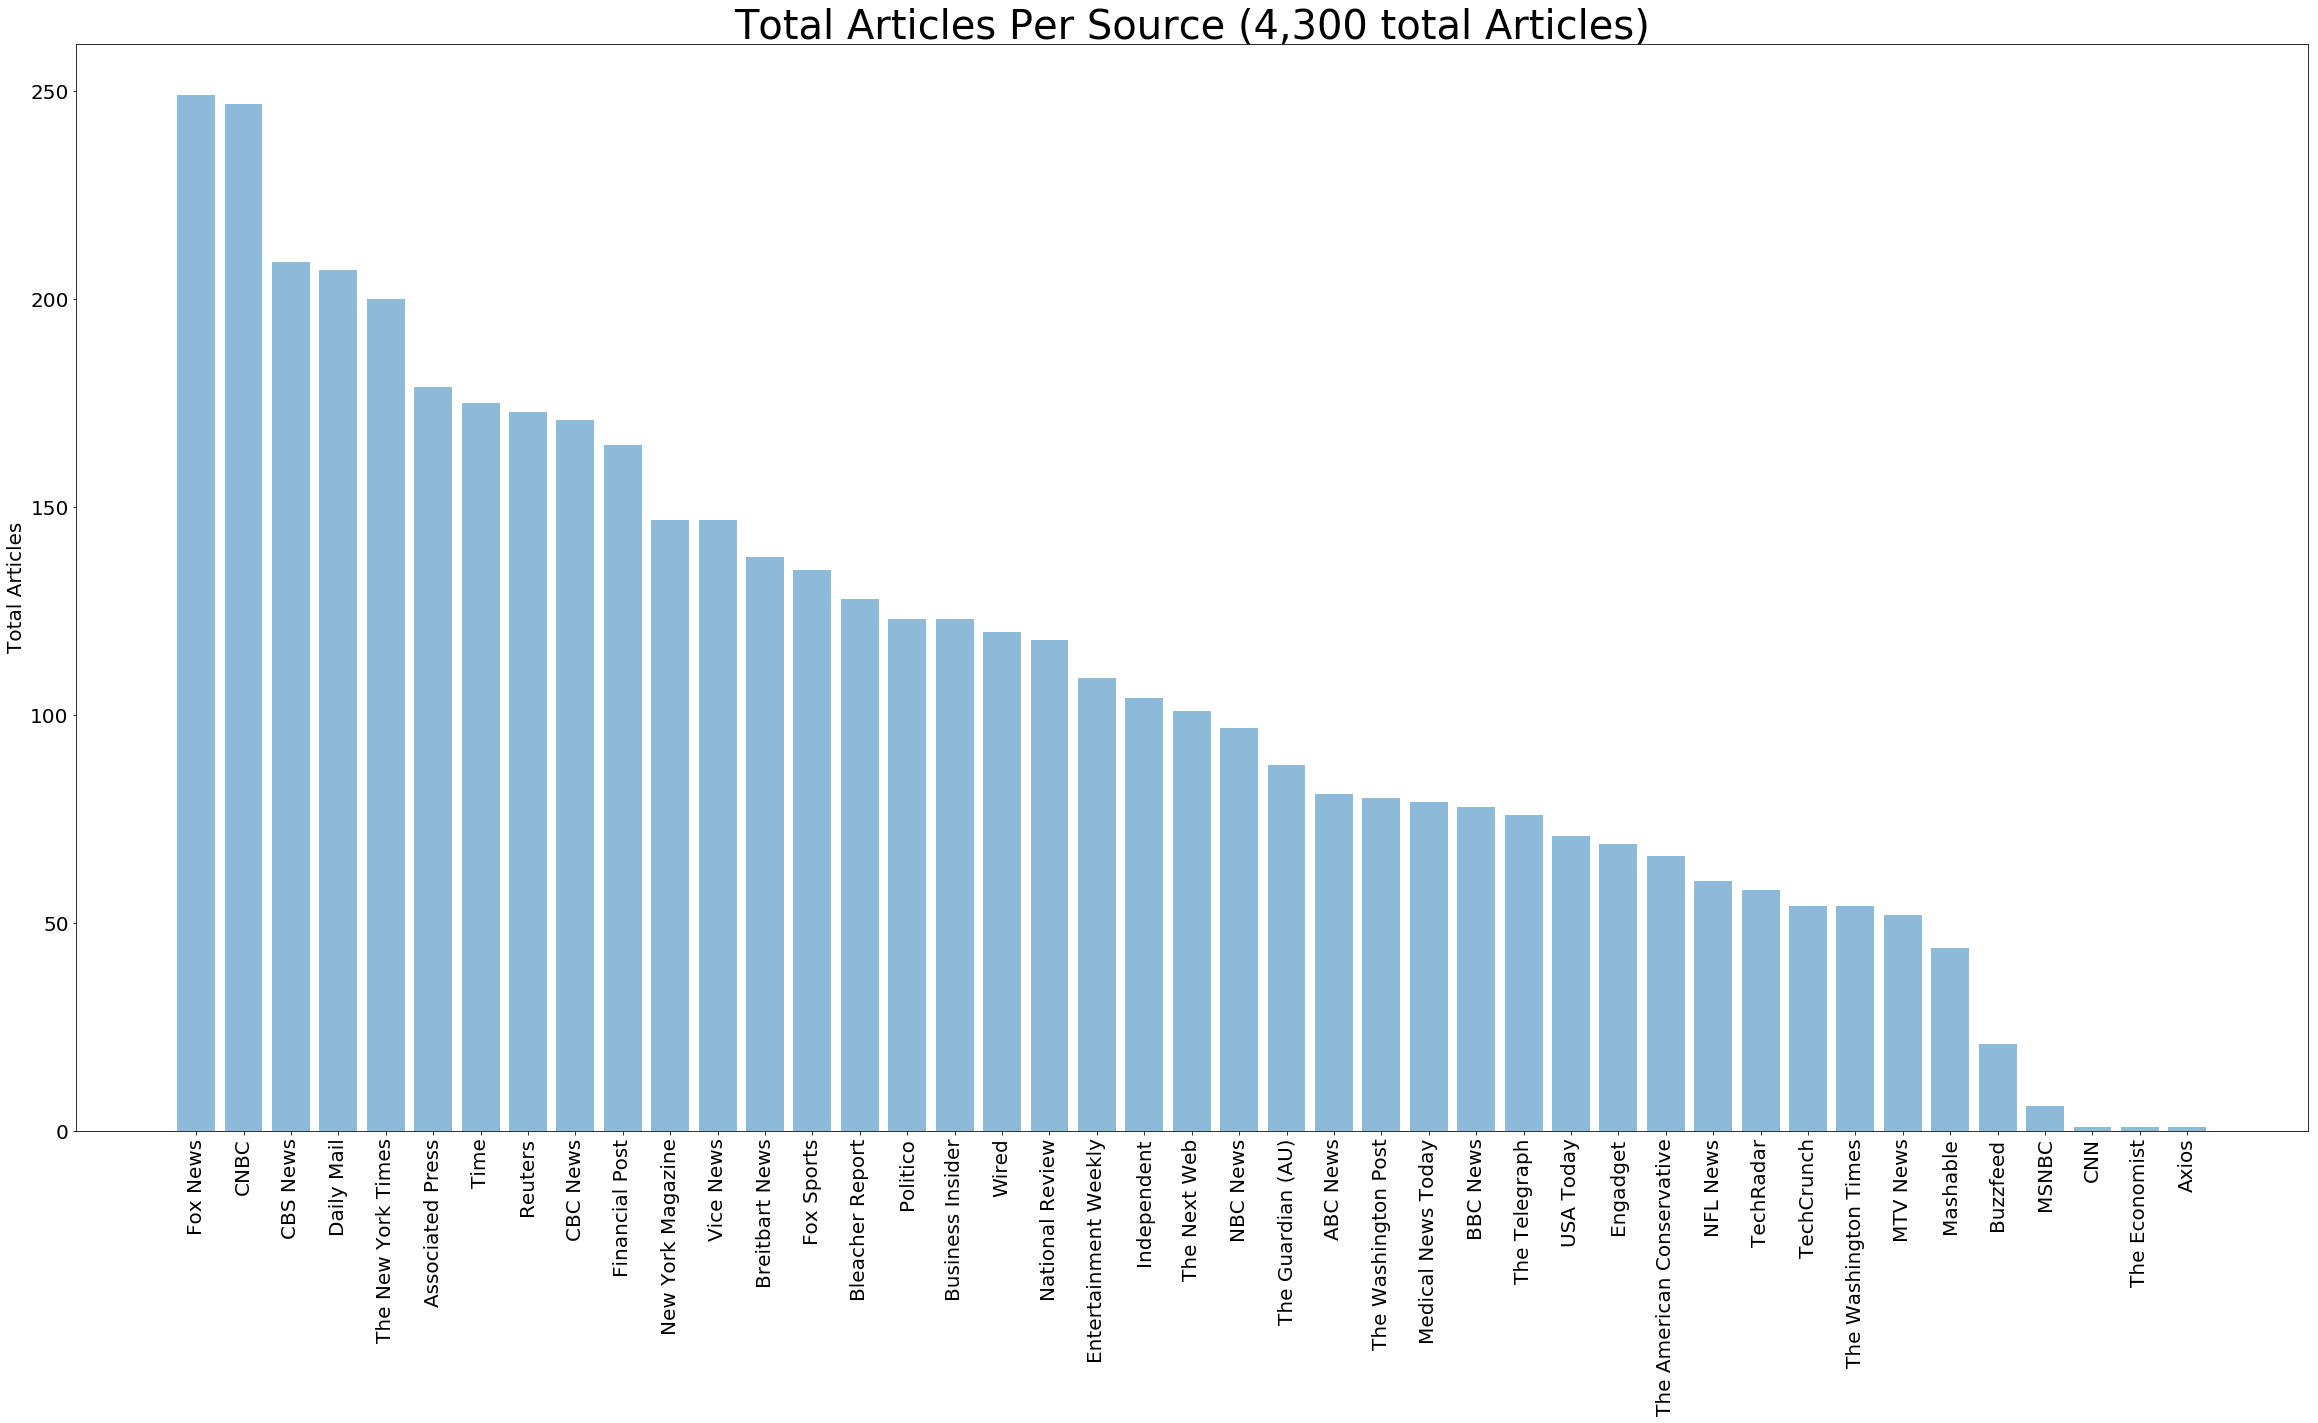

In [31]:
value_counts = pd.DataFrame(master_df.source_name.value_counts())

fig, ax = plt.subplots()
fig.set_size_inches(40, 20)   
plt.xticks(fontsize=20, rotation=90)
plt.bar(list(value_counts.index), list(value_counts.source_name), align='center', alpha=0.5)
plt.ylabel('Total Articles', fontsize=20)
plt.yticks(fontsize=20)
ax.set_title("Total Articles Per Source (4,300 total Articles)", fontsize=40)
 
plt.show()

In [4]:
def plot_hist(parameter, source_name=None):
    data = master_df[parameter]
    if source_name != None:
        new_df = master_df[(master_df.source_name == source_name)]
        data = new_df[parameter]
    fig, ax = plt.subplots()
    fig.set_size_inches(40, 20)   
    n, bins, patches = plt.hist(data,facecolor='g', alpha=0.75)
    plt.xlabel(parameter.capitalize(),fontsize=20)
    plt.ylabel('Frequency', fontsize=20)
    ax.set_title('Histogram of ' + parameter,fontsize=40)
    plt.yticks(fontsize=20)
    plt.xticks(fontsize=20)
    plt.grid(True)
    plt.show()
    display(master_df[parameter].describe())

In [5]:
stats = master_df.describe()
stats = stats.drop('main_cluster',axis=1)
Metric_widget = widgets.Dropdown(options=list(stats.columns),value = 'percent_opinion',description = '', disabled = False)
Source_widget = widgets.Dropdown(options=list(set(master_df.source_name)),value = None,description = 'Source', disabled = False)

interact(plot_hist, parameter = Metric_widget,source_name=Source_widget);

interactive(children=(Dropdown(description='parameter', index=7, options=('neg', 'neu', 'pos', 'compound', 'su…

In [6]:
# data_widget = widgets.ToggleButton(options=[master_df],value = master_df,description = '', disabled = False)
metric_widget1 = widgets.Dropdown(options=list(stats.columns),value = 'percent_opinion',description = 'Metric', disabled = False)
limit_widget = widgets.IntSlider(min=1, max=45, step=1, value=45)
title_widget = widgets.Dropdown(options=list(stats.columns),value = 'percent_opinion',description = 'Title', disabled = False)

interact(box_plots,metric=metric_widget1, title = title_widget, sources_toshow_int=limit_widget);

interactive(children=(Dropdown(description='Metric', index=7, options=('neg', 'neu', 'pos', 'compound', 'subje…

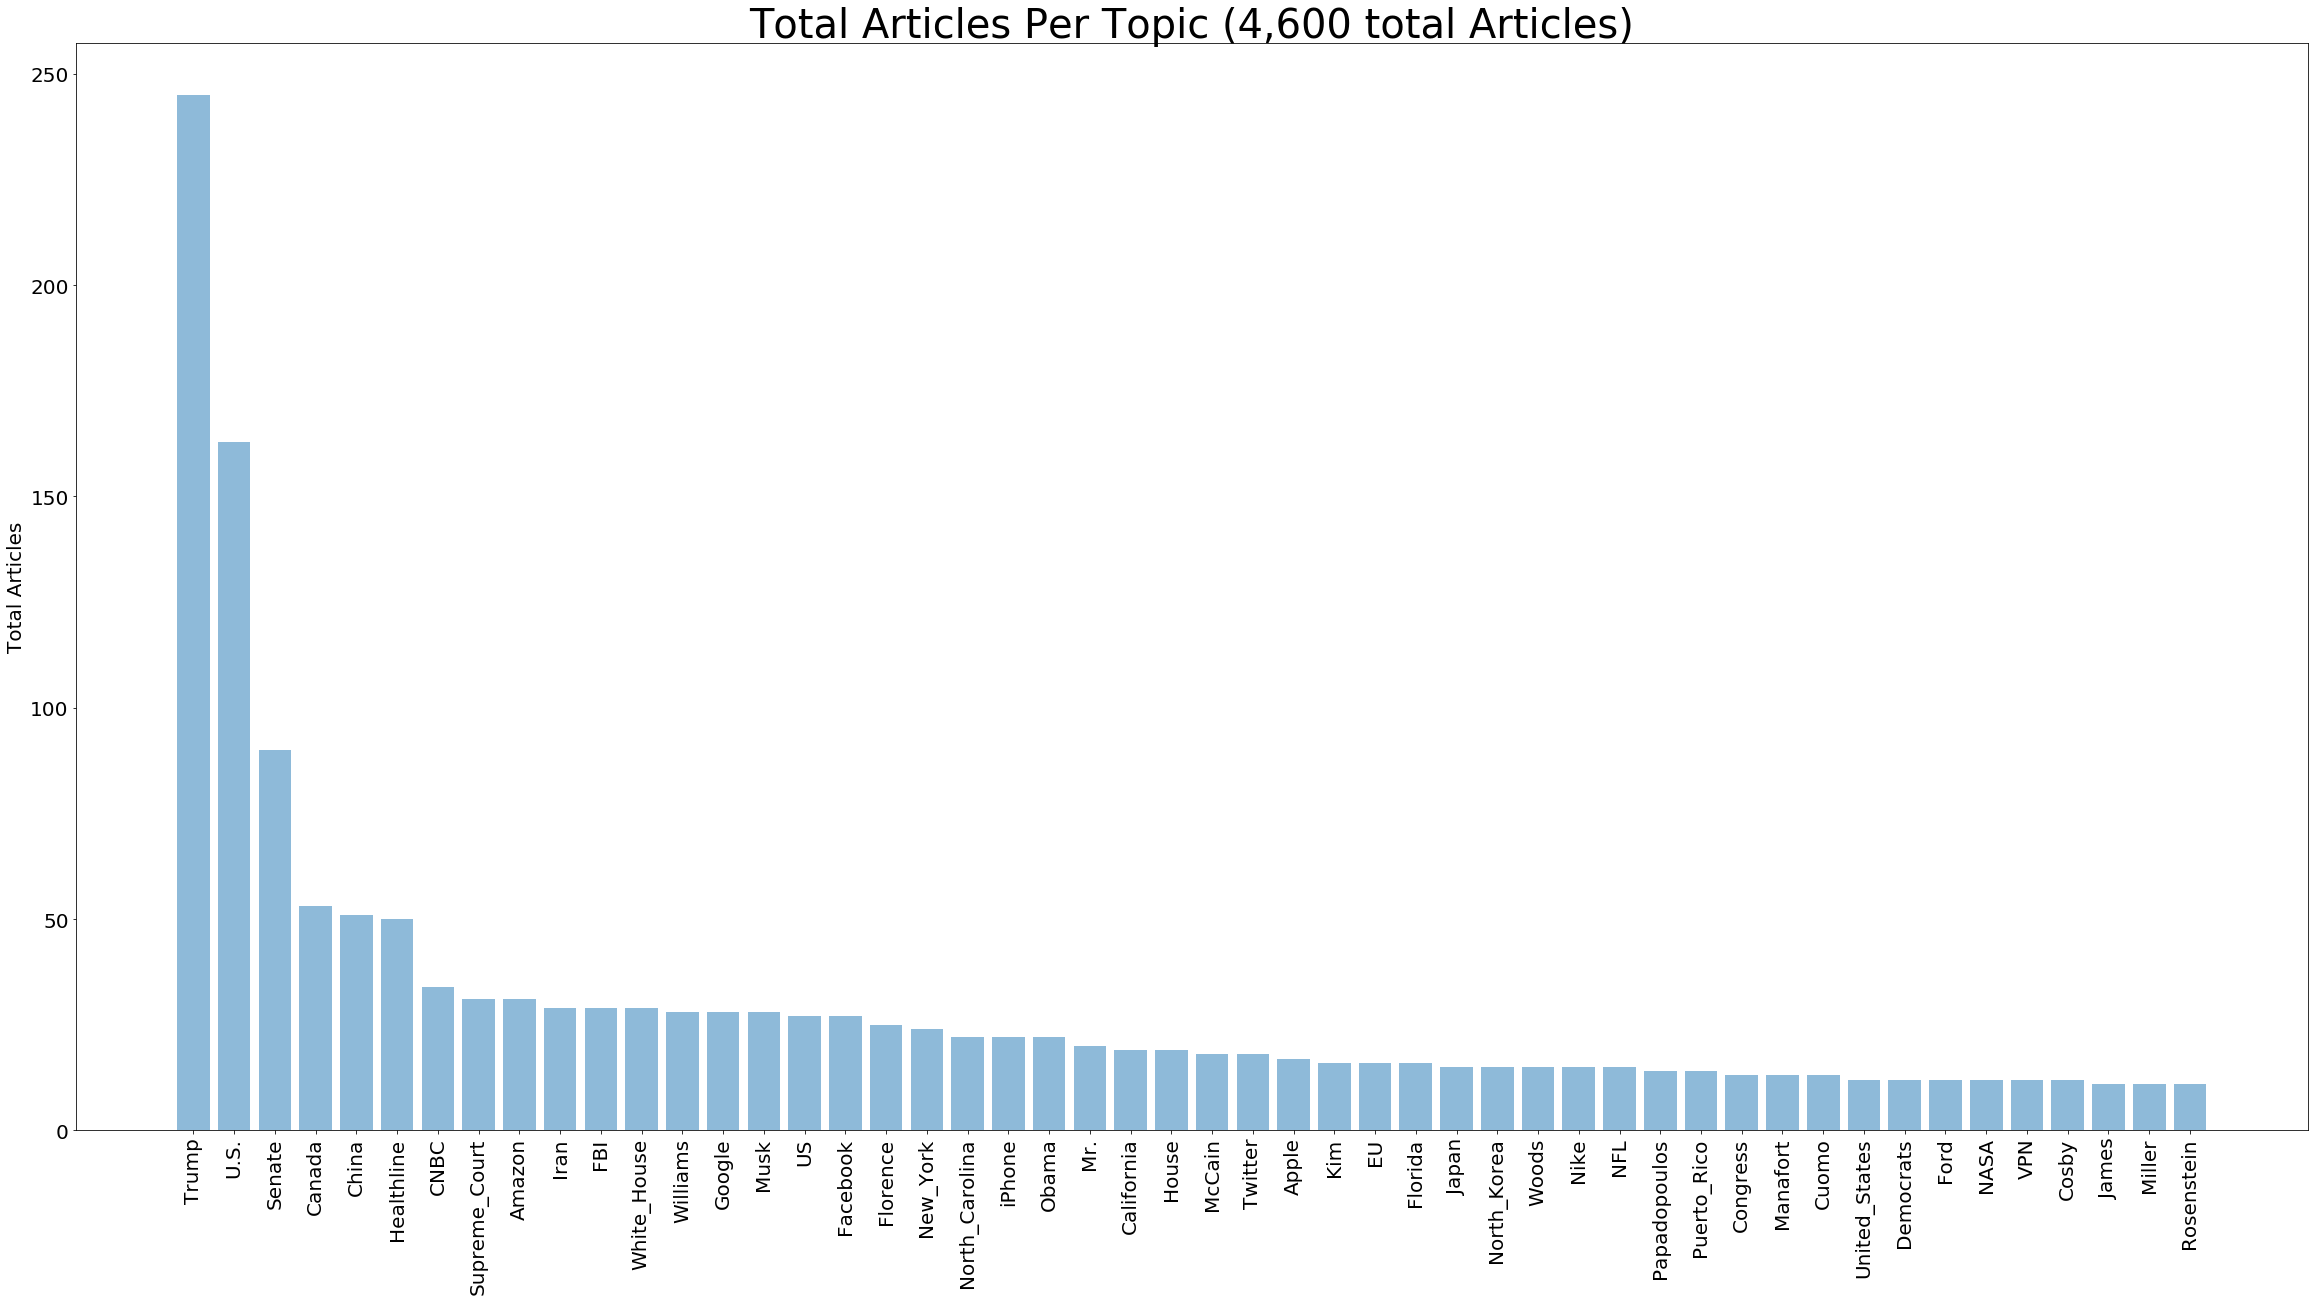

In [30]:
topic_counts = master_df.main_subject.value_counts()

fig, ax = plt.subplots()
fig.set_size_inches(40, 20)   
plt.xticks(fontsize=20, rotation=90)
plt.bar(list(topic_counts.index)[:50], list(topic_counts.values)[:50], align='center', alpha=0.5)
plt.ylabel('Total Articles', fontsize=20)
plt.yticks(fontsize=20)
ax.set_title("Total Articles Per Topic (4,600 total Articles)", fontsize=40)
 
plt.show()

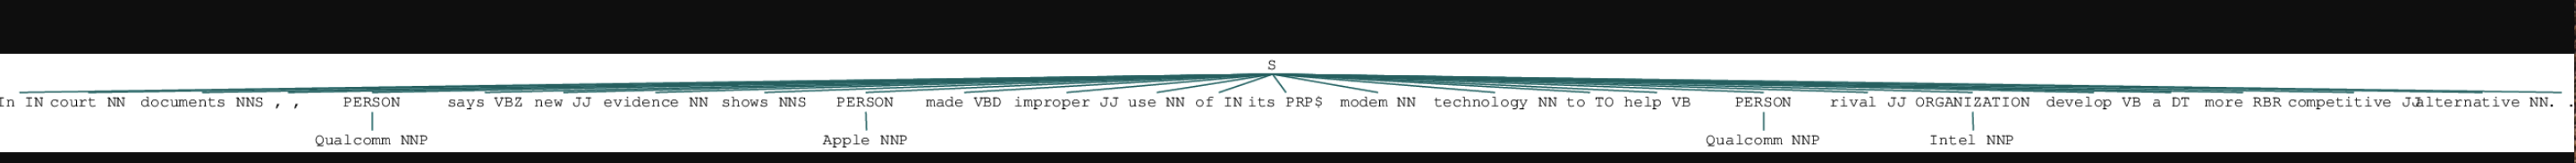

In [17]:

Image(filename='pic.png') 

In [20]:
OPINION_LEANING = ['PDT', 'RBR', 'RBS','JJR','JJS'] 
#predeterminer (all the kids)
#comparative adverb (better), superlative adverb (best) 
#comparative and superlative adjectives (bigger, biggest)

In [44]:
nb = pd.read_csv('Classification_models/Opinion/grid_search_Opinion_.csv',index_col=0)
nb

mean_fit_time  std_fit_time  mean_score_time  std_score_time  param_alpha  \
0  0.070758       0.006169      0.005266         0.001219        1             

         params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 1}  0.941103           0.945698           0.941938            

   split3_test_score  split4_test_score  split5_test_score  split6_test_score  \
0  0.942774           0.939014           0.943144           0.949833            

   split7_test_score  split8_test_score  split9_test_score  mean_test_score  \
0  0.944398           0.94189            0.946906           0.943669          

   std_test_score  rank_test_score  split0_train_score  split1_train_score  \
0  0.002977        1                0.960345            0.959881             

   split2_train_score  split3_train_score  split4_train_score  \
0  0.960671            0.960624            0.960485             

   split5_train_score  split6_train_score  split7_train_score  \
0  0.960349            0.960953            0.961881             

   split8_train_score  split9_train_score  mean_train_score  std_train_score  
0  0.95956             0.959328            0.960408          0.00069

In [ ]:
plt.scatter(nb, X[:, 1], c = y_hat, s = 25)
cl_centers_6 = k_means_6.cluster_centers_
plt.scatter(cl_centers_6[:, 0], cl_centers_6[:, 1], c='black', s=100);

In [7]:
metric_widget1 = widgets.Dropdown(options=list(stats.columns),value = 'percent_opinion',description = 'Metric', disabled = False)
limit_widget = widgets.IntSlider(min=1, max=45, step=1, value=45)
title_widget = widgets.Dropdown(options=list(stats.columns),value = 'percent_opinion',description = 'Title', disabled = False)
subject_widget1 = widgets.Dropdown(options=list(master_df.main_subject.value_counts()[:10].index),value = 'Trump',description = 'Source', disabled = False)
interact(plot_metrics_vs_topics,metric=metric_widget1, title = title_widget, sources_toshow_int=limit_widget, subject = subject_widget1);

interactive(children=(Dropdown(description='Metric', index=7, options=('neg', 'neu', 'pos', 'compound', 'subje…

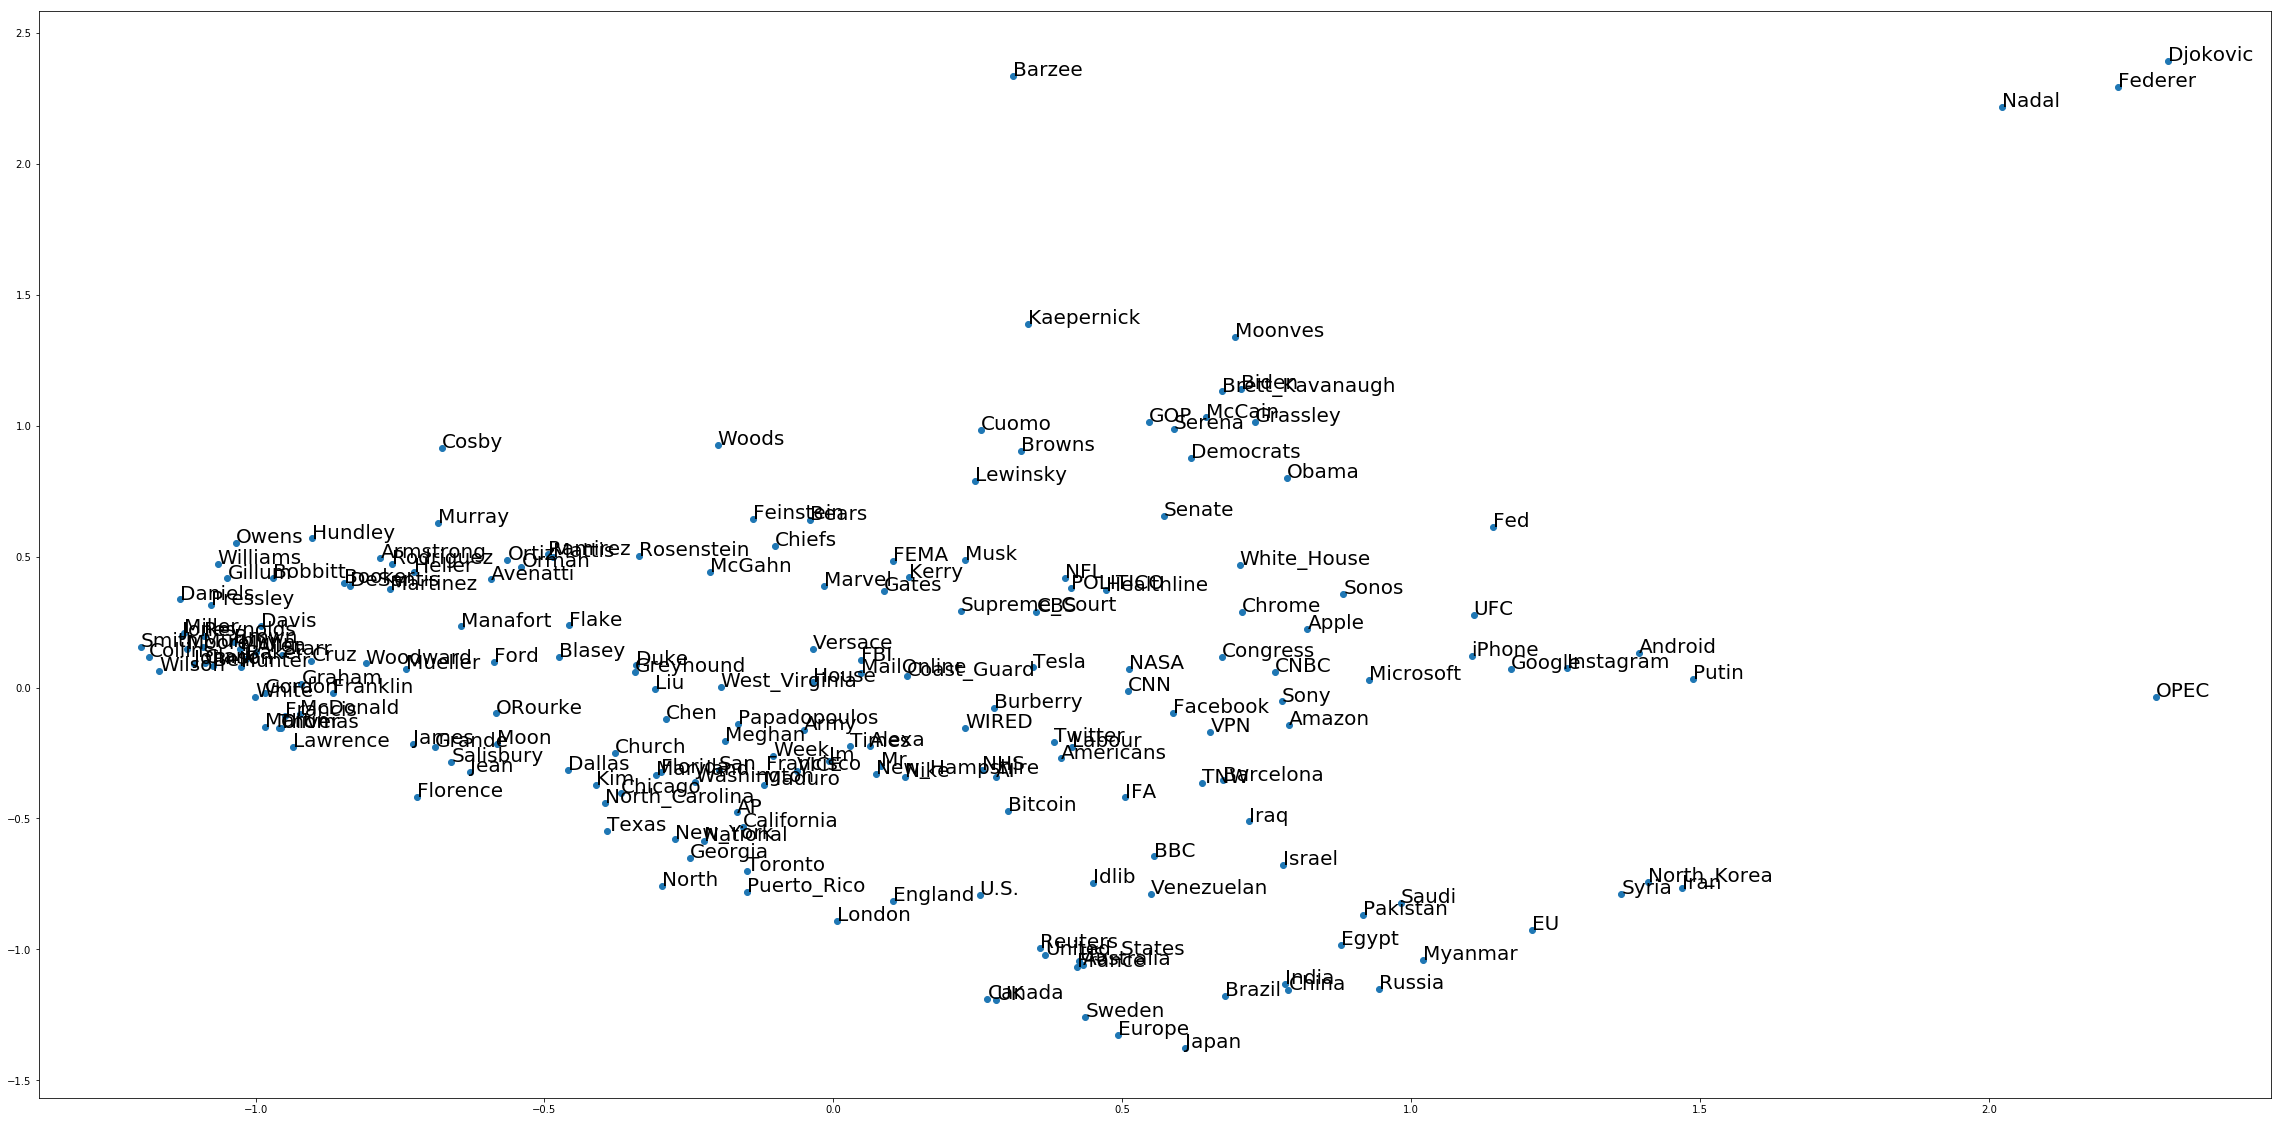

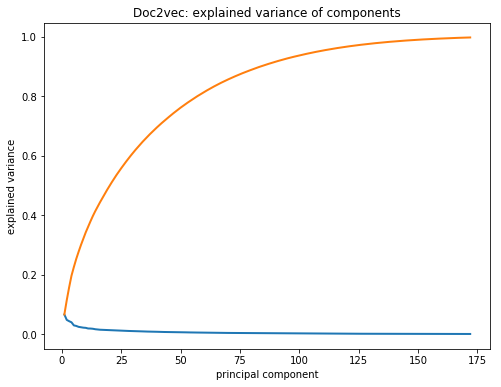

In [28]:
vectorized_topics = pd.read_csv('Archive_CSV/vectorized_topics.csv',index_col=0)
subjects = master_df.main_subject.value_counts()[1:200]
adjust_vecs = vectorized_topics[(vectorized_topics.index.isin(list(subjects.index)))]
adjust_vecs = adjust_vecs.drop('cluster',axis=1)

X = adjust_vecs
pca = PCA(n_components=172)
result = pca.fit_transform(X)
# create a scatter plot of the projection
fig, ax = plt.subplots()
fig.set_size_inches(40, 20)
ax.scatter(result[:, 0], result[:, 1])
words = list(adjust_vecs.index)
for i, word in enumerate(words):
    text = ax.annotate(word, xy=(result[i, 0], result[i, 1]))
    text.set_fontsize(20)
x_values = range(1, pca.n_components_+1)
ratio = pca.explained_variance_ratio_
def plot_explained_variance(total_features,exp_variance_ratio):
    fig, ax = plt.subplots(figsize=(8,6))
    ax.plot(total_features, exp_variance_ratio, lw=2, label='explained variance')
    ax.plot(total_features, np.cumsum(exp_variance_ratio), lw=2, label='cumulative explained variance')
    ax.set_title('Doc2vec: explained variance of components')
    ax.set_xlabel('principal component')
    ax.set_ylabel('explained variance')
    plt.show()
plot_explained_variance(x_values,ratio)

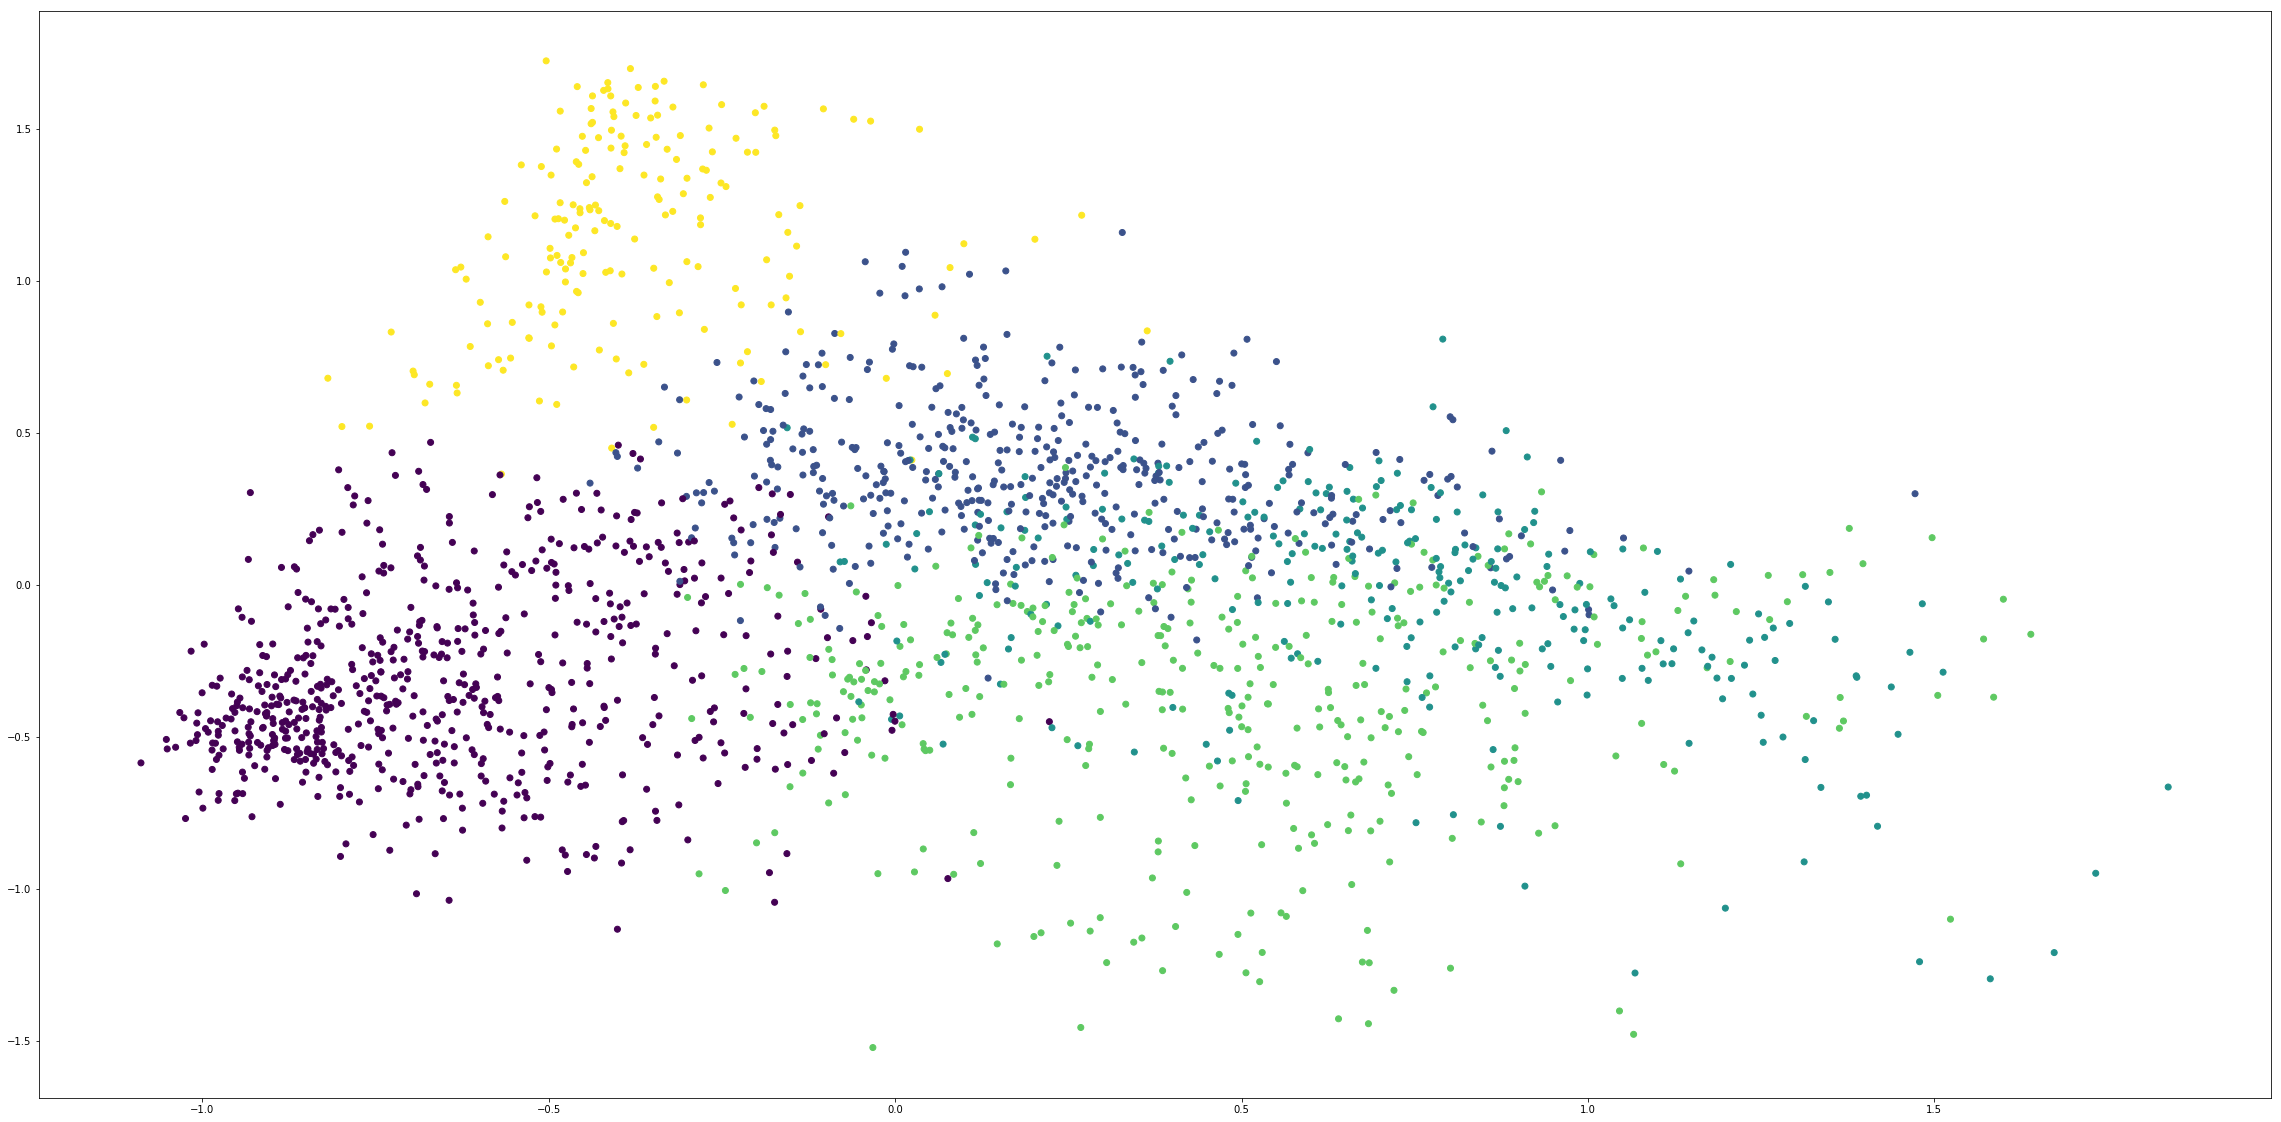

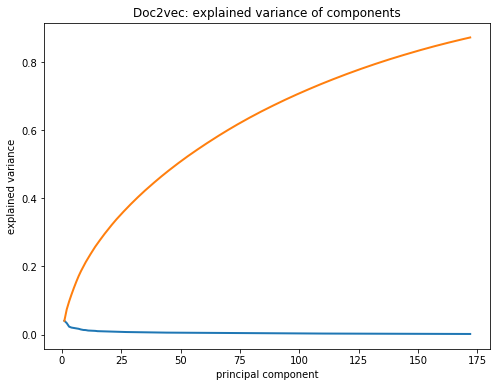

In [23]:
vectorized_topics = pd.read_csv('Archive_CSV/vectorized_topics.csv',index_col=0)
subjects = master_df.main_subject.value_counts()
adjust_vecs = vectorized_topics[(vectorized_topics.index.isin(list(subjects.index)))]

X = adjust_vecs.iloc[:,:300]
pca = PCA(n_components=172)
result = pca.fit_transform(X)
# create a scatter plot of the projection
fig, ax = plt.subplots()
fig.set_size_inches(40, 20)
ax.scatter(result[:, 0], result[:, 1], c=adjust_vecs.cluster)
words = list(adjust_vecs.index)
# for i, word in enumerate(words):
#     text = ax.annotate(word, xy=(result[i, 0], result[i, 1]))
#     text.set_fontsize(20)
x_values = range(1, pca.n_components_+1)
ratio = pca.explained_variance_ratio_
def plot_explained_variance(total_features,exp_variance_ratio):
    fig, ax = plt.subplots(figsize=(8,6))
    ax.plot(total_features, exp_variance_ratio, lw=2, label='explained variance')
    ax.plot(total_features, np.cumsum(exp_variance_ratio), lw=2, label='cumulative explained variance')
    ax.set_title('Doc2vec: explained variance of components')
    ax.set_xlabel('principal component')
    ax.set_ylabel('explained variance')
    plt.show()
plot_explained_variance(x_values,ratio)

In [117]:
df_0 = master_df[(master_df.main_cluster == 0)]
df_1 = master_df[(master_df.main_cluster == 1)]
df_2 = master_df[(master_df.main_cluster == 2)]
df_3 = master_df[(master_df.main_cluster == 3)]
df_4 = master_df[(master_df.main_cluster == 4)]

In [119]:
print('Cluster 0')
display(pd.DataFrame(df_0.main_subject.value_counts()[:5]))
print('Cluster 1')
display(pd.DataFrame(df_1.main_subject.value_counts()[:5]))
print('Cluster 2')
display(pd.DataFrame(df_2.main_subject.value_counts()[:5]))
print('Cluster 3')
display(pd.DataFrame(df_3.main_subject.value_counts()[:5]))

Cluster 0


main_subject
Williams  28          
Woods     15          
Manafort  13          
Cosby     12          
Ford      12

Cluster 1


main_subject
U.S.        163         
Healthline  50          
House       19          
Nike        15          
VPN         12

Cluster 2


main_subject
Canada  53          
China   51          
Iran    29          
US      27          
EU      16

Cluster 3


main_subject
Trump          245         
Senate         90          
CNBC           34          
Supreme_Court  31          
Amazon         31

In [51]:
def normalize_column(dataframe, column):
    normalized_column=(dataframe[column]-dataframe[column].mean())/dataframe[column].std()
    return normalized_column

In [155]:
reg_df = pd.read_csv('Archive_CSV/normalized_df.csv', index_col=0)

In [156]:
reg_df.head(1)

author source_name       neg       neu       pos  compound  \
0  Felix Salmon  Axios       2.930989 -3.163052  0.836945 -1.45424    

   subjectivity     main_subject sub_topic  main_cluster sub_cluster  \
0 -0.211723      Great_Recession  Great     3             1            

   total_factual  total_opinions  percent_opinion  total_sentences  \
0 -1.092576       0.005374        0.727499        -0.973483          

   total_words  article_length_minutes title_class  
0 -1.565727    -1.52499                 factual

In [171]:
# reg_df = reg_df.drop(['main_subject','sub_topic'],axis=1)
reg_dummies = reg_df
reg_dummies = reg_dummies.drop(['author'],axis=1)
reg_dummies = reg_dummies.drop(['main_subject'],axis=1)
reg_dummies = reg_dummies.drop(['sub_topic'],axis=1)
reg_dummies = pd.get_dummies(reg_dummies)
reg_dummies = reg_dummies.drop(['total_opinions', 'total_factual','subjectivity','percent_opinion'], axis=1)

In [172]:
# reg_dummies
reg_no_dummies = reg_dummies.iloc[:,:9]

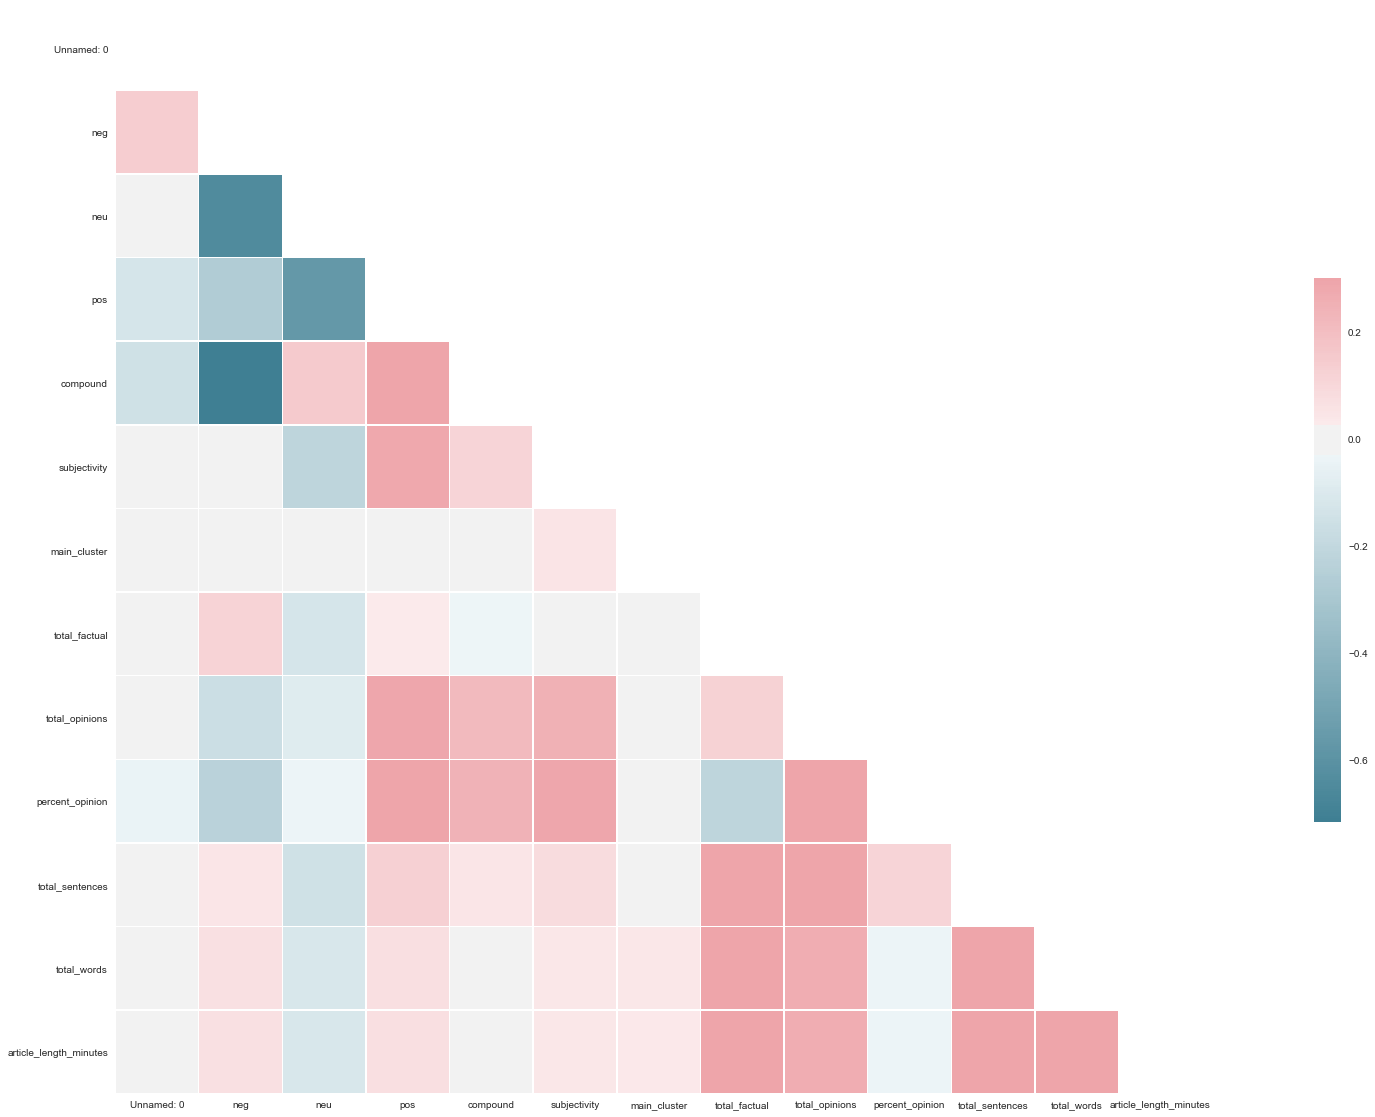

In [154]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")

corr = reg_df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(40, 20))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Highly Correlated


percent_opinion
source_name_Entertainment Weekly  0.080637       
source_name_MTV News              0.095527       
source_name_Mashable              0.109322       
source_name_TechCrunch            0.119839       
source_name_Business Insider      0.134970       
source_name_Wired                 0.142179       
source_name_Engadget              0.211666       
source_name_TechRadar             0.226445       
source_name_The Next Web          0.226926       
percent_opinion                   1.000000

Low Correlation


percent_opinion
source_name_Fox News             -0.125401       
source_name_Reuters              -0.124796       
source_name_Associated Press     -0.104407       
source_name_Medical News Today   -0.082341       
source_name_Politico             -0.077689       
source_name_The Telegraph        -0.058639       
source_name_The Washington Post  -0.057912       
source_name_The Washington Times -0.057482       
source_name_Time                 -0.053503       
source_name_CBC News             -0.052092

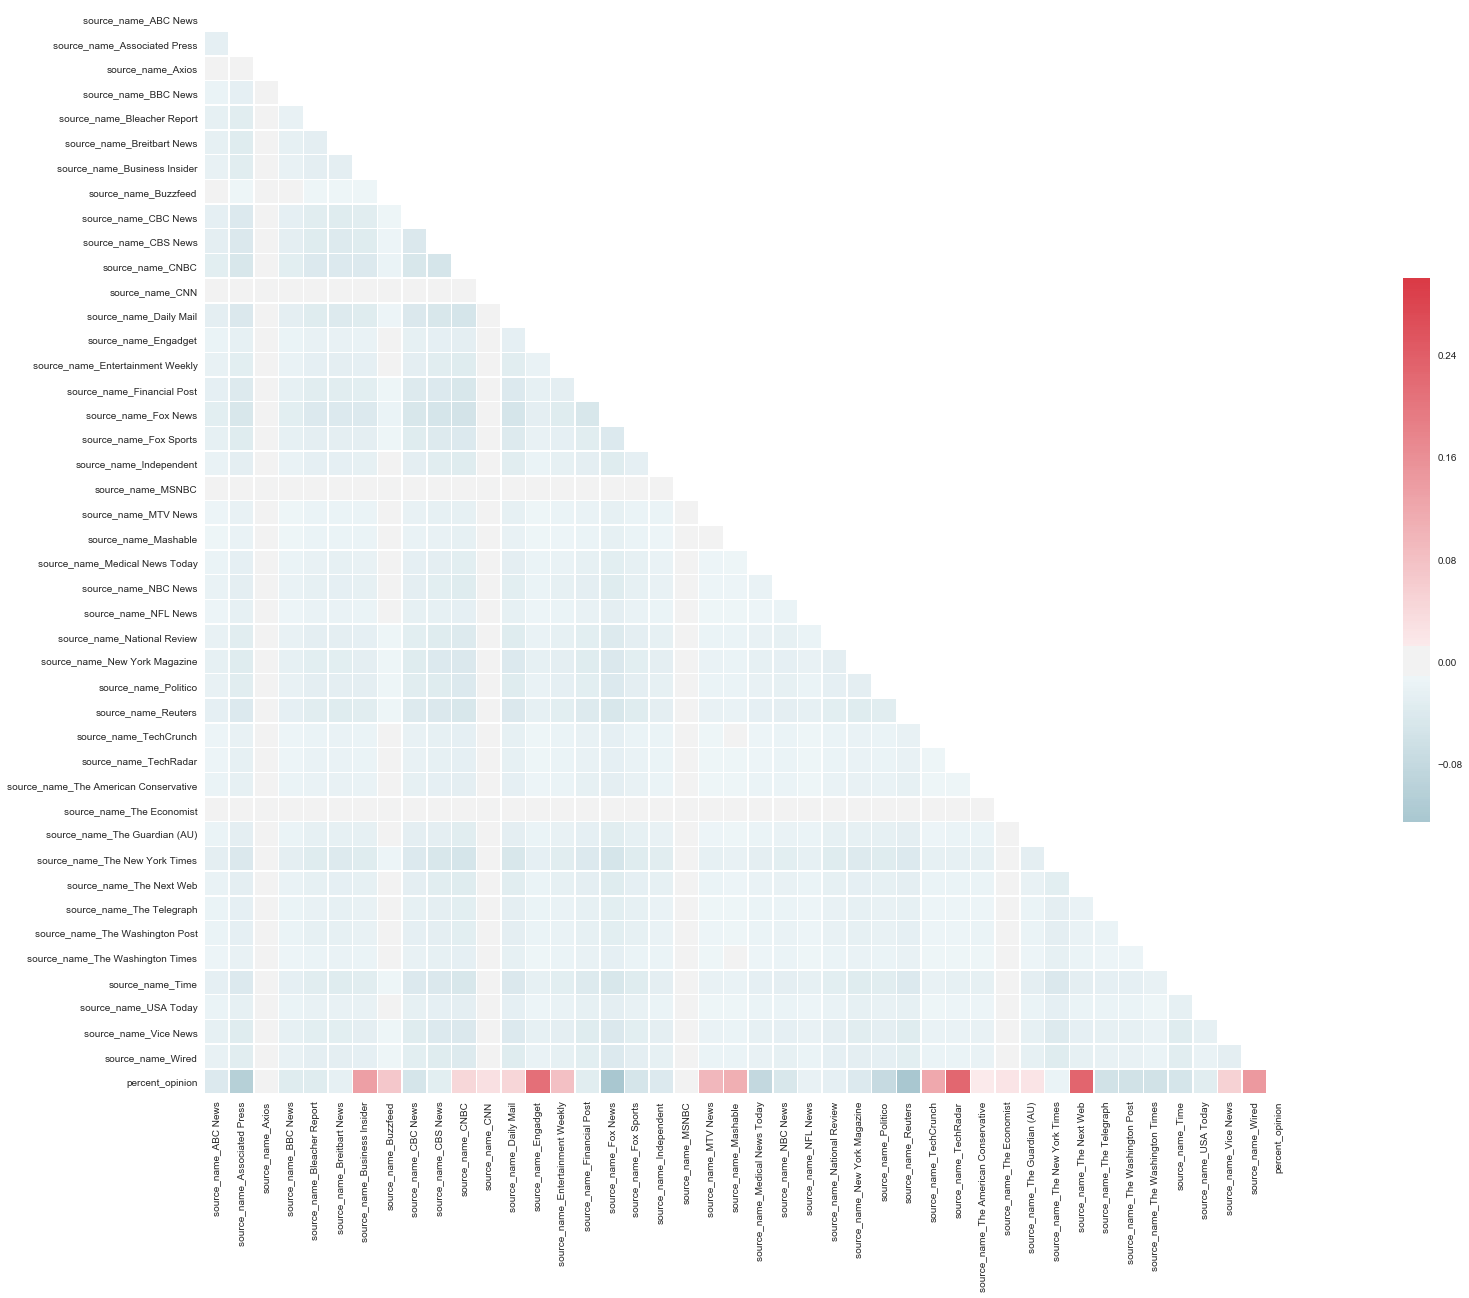

In [151]:
sns.set(style="white")
source_dummies = reg_dummies.ix[:,['source_name_ABC News',
       'source_name_Associated Press', 'source_name_Axios',
       'source_name_BBC News', 'source_name_Bleacher Report',
       'source_name_Breitbart News', 'source_name_Business Insider',
       'source_name_Buzzfeed', 'source_name_CBC News', 'source_name_CBS News',
       'source_name_CNBC', 'source_name_CNN', 'source_name_Daily Mail',
       'source_name_Engadget', 'source_name_Entertainment Weekly',
       'source_name_Financial Post', 'source_name_Fox News',
       'source_name_Fox Sports', 'source_name_Independent',
       'source_name_MSNBC', 'source_name_MTV News', 'source_name_Mashable',
       'source_name_Medical News Today', 'source_name_NBC News',
       'source_name_NFL News', 'source_name_National Review',
       'source_name_New York Magazine', 'source_name_Politico',
       'source_name_Reuters', 'source_name_TechCrunch',
       'source_name_TechRadar', 'source_name_The American Conservative',
       'source_name_The Economist', 'source_name_The Guardian (AU)',
       'source_name_The New York Times', 'source_name_The Next Web',
       'source_name_The Telegraph', 'source_name_The Washington Post',
       'source_name_The Washington Times', 'source_name_Time',
       'source_name_USA Today', 'source_name_Vice News', 'source_name_Wired','percent_opinion']]
corr = source_dummies.corr()
# corr = corr['percent_opinion']
for_display = pd.DataFrame(corr.percent_opinion.sort_values())
print('Highly Correlated')
display(pd.DataFrame(for_display['percent_opinion'][-10:]))
print('Low Correlation')
display(pd.DataFrame(for_display['percent_opinion'][:10]))
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(40, 20))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [174]:
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.model_selection import train_test_split
X = reg_dummies
y = reg_df.percent_opinion
#Perform test train spli
X_train , X_test, y_train, y_test = train_test_split(X, y)

ridge_reg = Ridge(alpha=2.3)
ridge_reg.fit(X_train, y_train)

lasso_reg = Lasso(alpha = .1)
lasso_reg.fit(X_train, y_train)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

def rss(residual_col):
    return sum(residual_col.astype(float).map(lambda x: x**2))

print('Train Error  Ridge Model', rss(y_train - ridge_reg.predict(X_train)))
print('Test Error Ridge Model', rss(y_test - ridge_reg.predict(X_test)))
print('\n')

print('Train Error Lasso Model', rss(y_train - lasso_reg.predict(X_train)))
print('Test Error Lasso Model', rss(y_test - lasso_reg.predict(X_test)))
print('\n')

print('Train Error Unpenalized Linear Model', rss(y_train - lin_reg.predict(X_train)))
print('Test Error Unpenalized  Linear Model', rss(y_test - lin_reg.predict(X_test)))

Train Error  Ridge Model 1713.921026988434
Test Error Ridge Model 583.888791220382


Train Error Lasso Model 3117.9571405926604
Test Error Lasso Model 991.1566905659947


Train Error Unpenalized Linear Model 1709.7544801726926
Test Error Unpenalized  Linear Model 585.7851583841197


In [175]:
X = reg_no_dummies
y = reg_df.percent_opinion
#Perform test train spli
X_train , X_test, y_train, y_test = train_test_split(X, y)

ridge_reg = Ridge(alpha=2.3)
ridge_reg.fit(X_train, y_train)

lasso_reg = Lasso(alpha = .1)
lasso_reg.fit(X_train, y_train)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

def rss(residual_col):
    return sum(residual_col.astype(float).map(lambda x: x**2))

print('Train Error  Ridge Model', rss(y_train - ridge_reg.predict(X_train)))
print('Test Error Ridge Model', rss(y_test - ridge_reg.predict(X_test)))
print('\n')

print('Train Error Lasso Model', rss(y_train - lasso_reg.predict(X_train)))
print('Test Error Lasso Model', rss(y_test - lasso_reg.predict(X_test)))
print('\n')

print('Train Error Unpenalized Linear Model', rss(y_train - lin_reg.predict(X_train)))
print('Test Error Unpenalized  Linear Model', rss(y_test - lin_reg.predict(X_test)))

Train Error  Ridge Model 2832.3352663206815
Test Error Ridge Model 946.1923930058097


Train Error Lasso Model 3109.0844734227153
Test Error Lasso Model 1019.1346699424137


Train Error Unpenalized Linear Model 2831.5853149946493
Test Error Unpenalized  Linear Model 946.591684945566


In [82]:
def regression_evaluation(target, X_list):
    target = target
    X = X_list 
    X2 = sm.add_constant(X)
    # model = sm.ols(formula = 'over_under_line ~ np.power(total_points_against, 1)', data = reg_df).fit()

    est = sm.OLS(target, X2)
    est2 = est.fit()
    
    y_predicted = est2.fittedvalues
    y_actual = target
    rmse = math.sqrt(mean_squared_error(y_actual, y_predicted))
    residuals = y_actual-y_predicted
    
    plt.scatter(y_predicted,residuals)
    check = round(rmse_check(y_predicted, y_actual) - rmse)
    print(est2.summary())
    plt.scatter(y_predicted,residuals)
    
    print('RMSE=' + str(rmse) + ', check =' + str(check))

In [255]:
def poly_regression(x, y, degree_range, xlim_min, xlim_max, ylim_min, ylim_max,xfit1, xfit2, alpha = .75,s = 5,width = 2.5):
    plt.figure(figsize = (10,10))
    plt.ylim(ylim_min, ylim_max)
    plt.xlim(xlim_min,xlim_max)
    plt.scatter(x, y, s = s, alpha = alpha, color = 'green')
    for degree in degree_range:
        poly_model = make_pipeline(PolynomialFeatures(degree),
                               LinearRegression())
        poly_model.fit(x[:, np.newaxis], y)
        xfit = np.linspace(xfit1,xfit2, 10000)
        yfit = poly_model.predict(xfit[:, np.newaxis])
        plt.plot(xfit, yfit, label = 'degree={}'.format(degree),linewidth=width)
    plt.legend(loc = 'best')

In [262]:
x = reg_dummies.pos
y = reg_df.percent_opinion

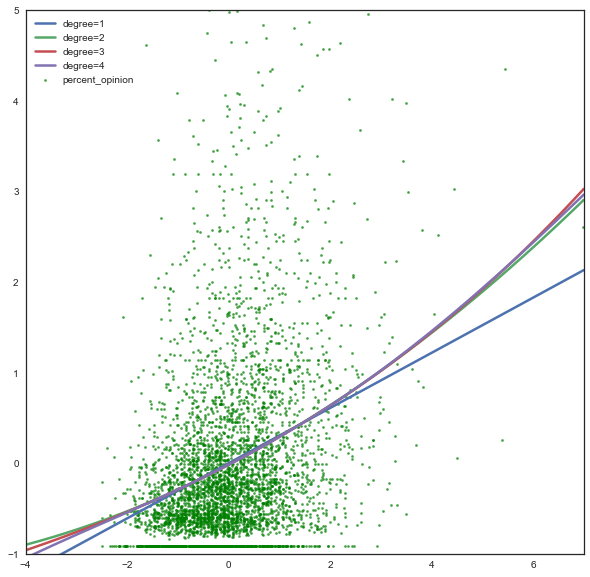

In [263]:
poly_regression(x,y,[1,2,3,4],-4,7,-1,5,-4,8)

                            OLS Regression Results                            
Dep. Variable:        percent_opinion   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     94.62
Date:                Tue, 02 Oct 2018   Prob (F-statistic):           3.77e-22
Time:                        19:00:57   Log-Likelihood:                -6486.9
No. Observations:                4605   AIC:                         1.298e+04
Df Residuals:                    4603   BIC:                         1.299e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0781      0.017     -4.691      0.0

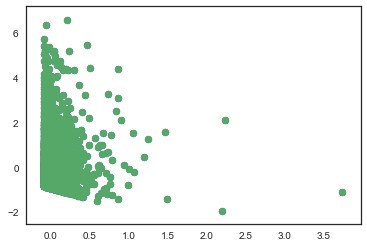

In [265]:
regression_evaluation(reg_df.percent_opinion,reg_dummies.pos**2)

In [83]:
def rmse_check(predictions, targets):

    differences = predictions - targets                       #the DIFFERENCEs.

    differences_squared = differences ** 2                    #the SQUAREs of ^

    mean_of_differences_squared = differences_squared.mean()  #the MEAN of ^

    rmse_val = np.sqrt(mean_of_differences_squared)           #ROOT of ^

    return rmse_val                                 

In [228]:

def log_log_regression_evaluation(target, X_list):
    split = train_test_split((np.log(np.abs(X_list)+1)), np.log(np.abs(target)+1))
    X_train, X_test, y_train, y_test = split[0], split[1], split[2],split[3]
    X = X_train
    target = y_train
    
    X2 = sm.add_constant(X)
    est = sm.OLS(target, X2)
    est2 = est.fit()
    
    y_predicted = est2.fittedvalues
    y_actual = target
    
    log_rmse = math.sqrt(mean_squared_log_error(y_actual, y_predicted))
    residuals = y_actual-y_predicted

    #plt.scatter(y_predicted,residuals)
    print(est2.summary())
    sns.distplot(residuals)
    print('Log RMSE=' + str(log_rmse))

                            OLS Regression Results                            
Dep. Variable:        percent_opinion   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     11.59
Date:                Tue, 02 Oct 2018   Prob (F-statistic):           0.000669
Time:                        18:45:07   Log-Likelihood:                -912.19
No. Observations:                3453   AIC:                             1828.
Df Residuals:                    3451   BIC:                             1841.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.4445      0.010     45.613   

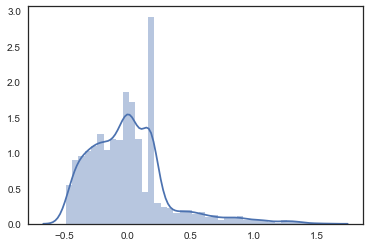

In [229]:
log_log_regression_evaluation(reg_df.percent_opinion,reg_dummies.main_cluster)